# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import pandas as pd

# Load the dataset from the uploaded file
df = pd.read_csv('water_potability.csv')

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the dataframe
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   C

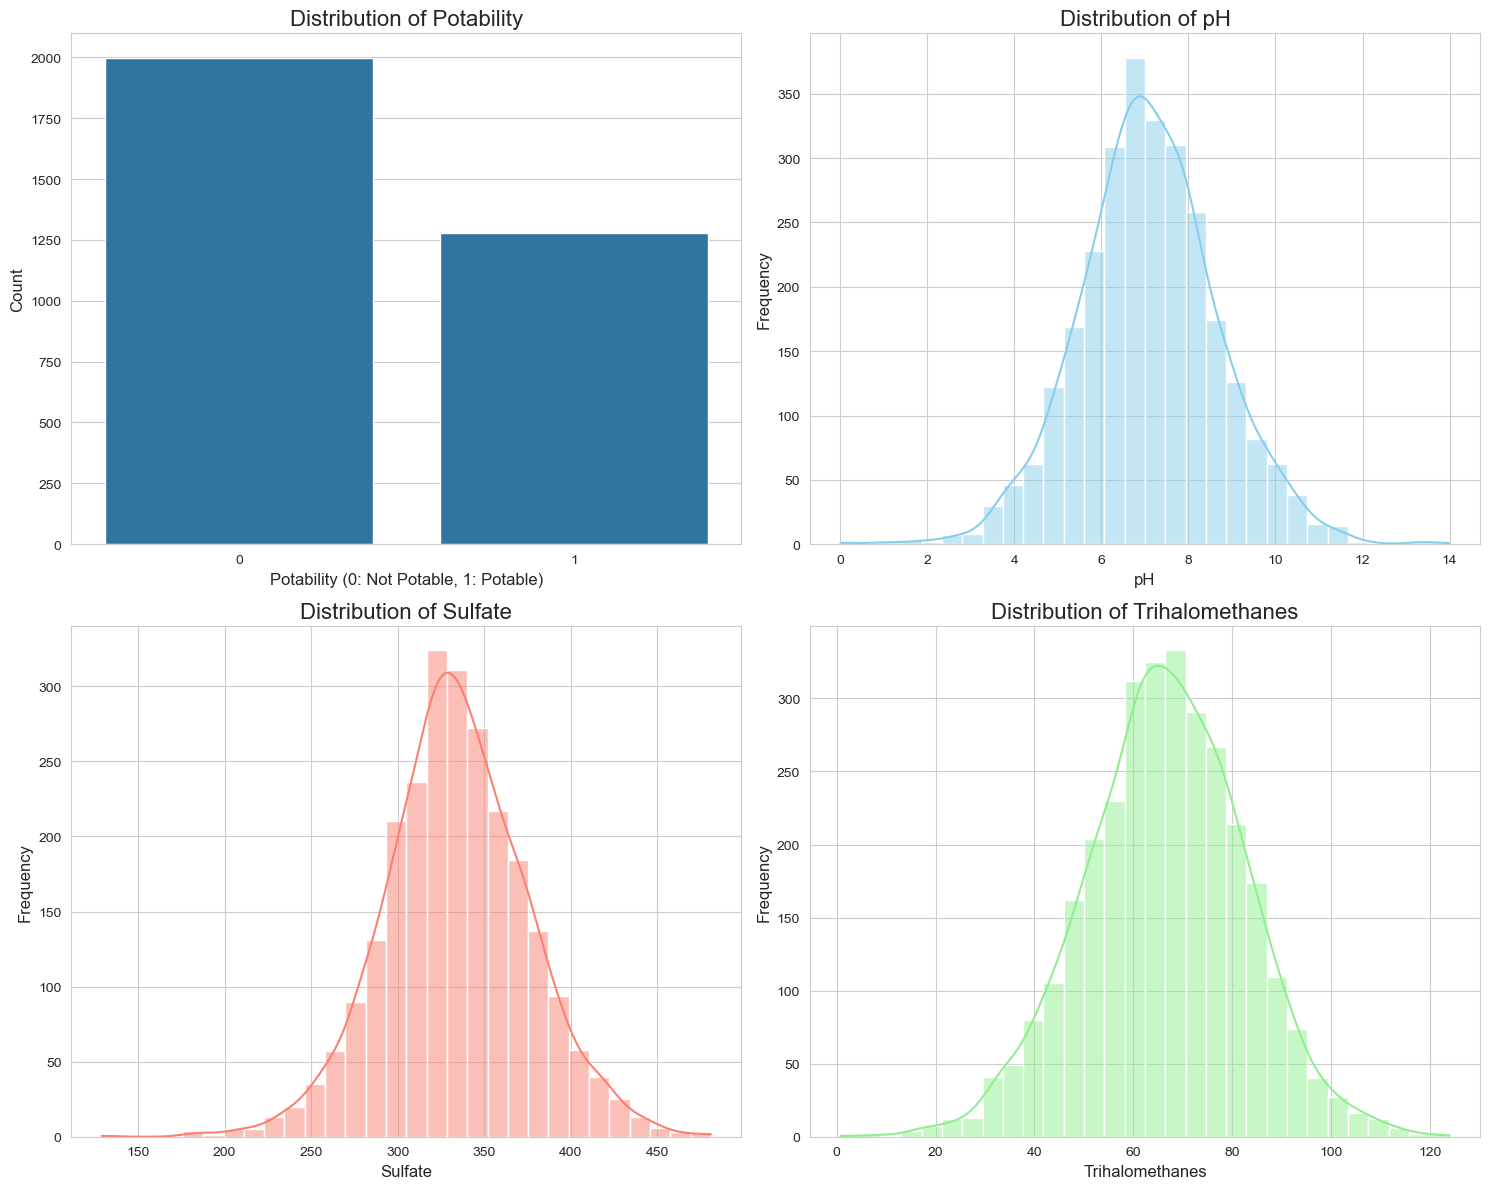

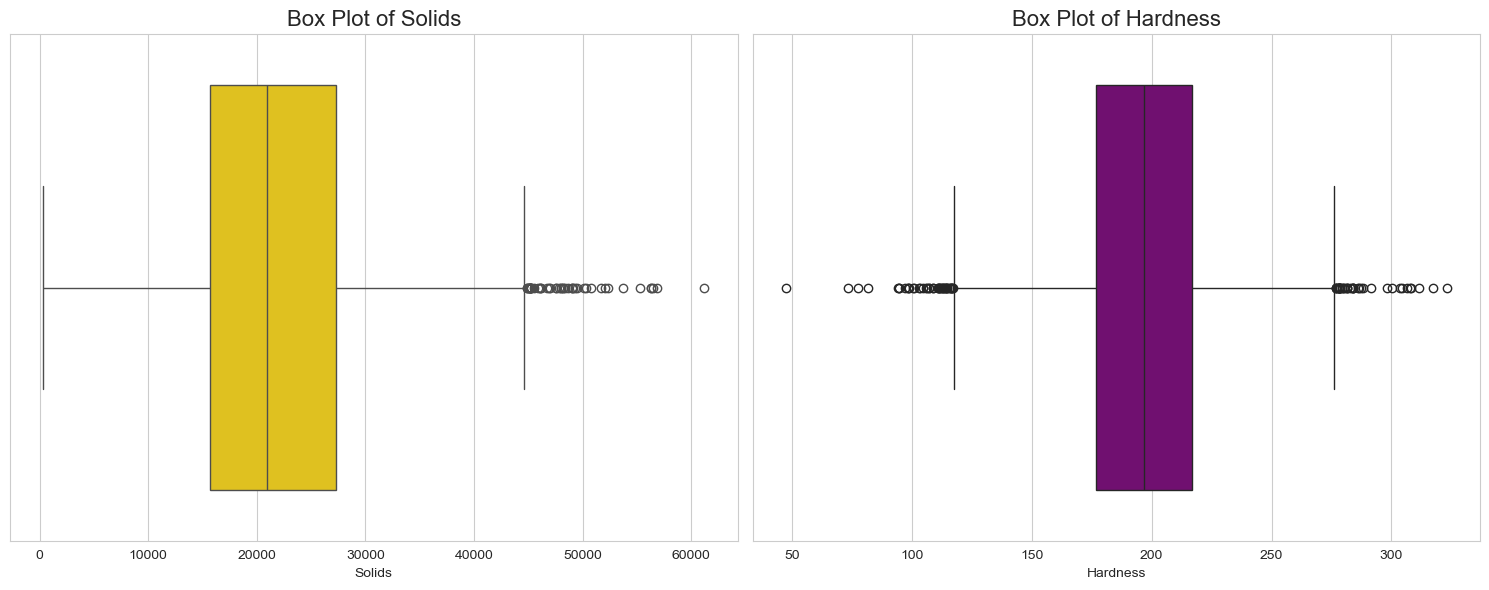

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# Plot the distribution of the target variable, 'Potability'
plt.subplot(2, 2, 1)
sns.countplot(x='Potability', data=df)
plt.title('Distribution of Potability', fontsize=16)
plt.xlabel('Potability (0: Not Potable, 1: Potable)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot the distribution of 'ph'
plt.subplot(2, 2, 2)
sns.histplot(df['ph'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of pH', fontsize=16)
plt.xlabel('pH', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot the distribution of 'Sulfate'
plt.subplot(2, 2, 3)
sns.histplot(df['Sulfate'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Sulfate', fontsize=16)
plt.xlabel('Sulfate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot the distribution of 'Trihalomethanes'
plt.subplot(2, 2, 4)
sns.histplot(df['Trihalomethanes'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Trihalomethanes', fontsize=16)
plt.xlabel('Trihalomethanes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.savefig('eda_distributions.png')

plt.show()

# Now, let's also check for outliers using box plots
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Solids'], color='gold')
plt.title('Box Plot of Solids', fontsize=16)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Hardness'], color='purple')
plt.title('Box Plot of Hardness', fontsize=16)

plt.tight_layout()
plt.savefig('eda_boxplots.png')

plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('water_potability.csv')

# Separate features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Impute missing values with the mean of each column
# This step is crucial and must be done on the full dataset
# to prevent data leakage from the test set.
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert the imputed numpy array back to a pandas DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the new datasets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Display the head of the imputed data to show the values have been filled
print("\nFirst 5 rows of the imputed DataFrame:")
print(X_imputed.head())

Shape of X_train: (2620, 9)
Shape of X_test: (656, 9)
Shape of y_train: (2620,)
Shape of y_test: (656,)

First 5 rows of the imputed DataFrame:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('water_potability.csv')

# Check for missing values
print("Missing values per column:\n")
print(df.isnull().sum())

# Visualize missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.savefig('missing_values_heatmap.png')
print("\nSaved missing_values_heatmap.png")
plt.close()

# Check for potential errors by examining data ranges
print("\nChecking for data range errors:")
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        min_val = df[column].min()
        max_val = df[column].max()
        if min_val < 0:
            print(f"Potential negative value error in '{column}': Min value is {min_val}")
        if 'ph' in column.lower() and (min_val < 0 or max_val > 14):
            print(f"pH range error in '{column}': Min is {min_val}, Max is {max_val}. Expected range [0-14].")

# Re-confirm the class balance
print("\nValue counts for the 'Potability' column:")
print(df['Potability'].value_counts())

Missing values per column:

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Saved missing_values_heatmap.png

Checking for data range errors:

Value counts for the 'Potability' column:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('water_potability.csv')

# Separate features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Impute missing values in the features using the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Display the number of missing values after imputation
print("Missing values after imputation:\n")
print(X_imputed.isnull().sum())
print("\nFirst 5 rows of the imputed DataFrame:")
print(X_imputed.head())

Missing values after imputation:

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

First 5 rows of the imputed DataFrame:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4  

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('water_potability.csv')

# Separate features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with balanced class weights
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("--- Logistic Regression Model Evaluation ---")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, ax=ax)
ax.set_title('Confusion Matrix for Logistic Regression (Balanced)')
plt.savefig('logistic_regression_confusion_matrix.png')
print("Saved logistic_regression_confusion_matrix.png")
plt.close()


--- Logistic Regression Model Evaluation ---

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.52      0.57       400
           1       0.42      0.54      0.47       256

    accuracy                           0.53       656
   macro avg       0.53      0.53      0.52       656
weighted avg       0.55      0.53      0.53       656

Saved logistic_regression_confusion_matrix.png


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Re-run preprocessing to ensure all variables are in scope
df = pd.read_csv('water_potability.csv')
X = df.drop('Potability', axis=1)
y = df['Potability']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate the model
print("--- Random Forest Model Evaluation ---")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test_scaled, y_test, ax=ax, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix for Random Forest')
plt.savefig('random_forest_confusion_matrix.png')
print("Saved random_forest_confusion_matrix.png")
plt.close()

--- Random Forest Model Evaluation ---

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       400
           1       0.62      0.31      0.41       256

    accuracy                           0.66       656
   macro avg       0.64      0.59      0.59       656
weighted avg       0.65      0.66      0.62       656

Saved random_forest_confusion_matrix.png


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- Data Preprocessing (Re-run for independent cell execution) ---

# Load the dataset
df = pd.read_csv('water_potability.csv')

# Separate features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Building: Random Forest Classifier ---

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_scaled)

# --- Model Evaluation ---

print("--- Random Forest Model Evaluation ---")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test_scaled, y_test, ax=ax, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix for Random Forest')
plt.savefig('random_forest_confusion_matrix.png')
print("Saved random_forest_confusion_matrix.png")
plt.close()

--- Random Forest Model Evaluation ---

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       400
           1       0.62      0.31      0.41       256

    accuracy                           0.66       656
   macro avg       0.64      0.59      0.59       656
weighted avg       0.65      0.66      0.62       656

Saved random_forest_confusion_matrix.png


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- Data Preprocessing (Re-run for independent cell execution) ---
df = pd.read_csv('water_potability.csv')
X = df.drop('Potability', axis=1)
y = df['Potability']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Building: Random Forest Classifier with Balanced Class Weights ---

# Initialize and train the Random Forest model with balanced class weights
random_forest_balanced_model = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest_balanced_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf_balanced = random_forest_balanced_model.predict(X_test_scaled)

# --- Model Evaluation ---
print("--- Random Forest Model with Balanced Class Weights Evaluation ---")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf_balanced))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(random_forest_balanced_model, X_test_scaled, y_test, ax=ax, cmap=plt.cm.Greens)
ax.set_title('Confusion Matrix for Random Forest (Balanced)')
plt.savefig('random_forest_balanced_confusion_matrix.png')
print("Saved random_forest_balanced_confusion_matrix.png")
plt.close()

--- Random Forest Model with Balanced Class Weights Evaluation ---

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       400
           1       0.68      0.29      0.40       256

    accuracy                           0.67       656
   macro avg       0.67      0.60      0.59       656
weighted avg       0.67      0.67      0.63       656

Saved random_forest_balanced_confusion_matrix.png


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- Data Preprocessing (Re-run for independent cell execution) ---
df = pd.read_csv('water_potability.csv')
X = df.drop('Potability', axis=1)
y = df['Potability']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Building: Random Forest Classifier with Balanced Class Weights ---

# Initialize and train the Random Forest model with balanced class weights
random_forest_balanced_model = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest_balanced_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf_balanced = random_forest_balanced_model.predict(X_test_scaled)

# --- Model Evaluation ---
print("--- Random Forest Model with Balanced Class Weights Evaluation ---")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf_balanced))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(random_forest_balanced_model, X_test_scaled, y_test, ax=ax, cmap=plt.cm.Greens)
ax.set_title('Confusion Matrix for Random Forest (Balanced)')
plt.savefig('random_forest_balanced_confusion_matrix.png')
print("Saved random_forest_balanced_confusion_matrix.png")
plt.close()

--- Random Forest Model with Balanced Class Weights Evaluation ---

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       400
           1       0.68      0.29      0.40       256

    accuracy                           0.67       656
   macro avg       0.67      0.60      0.59       656
weighted avg       0.67      0.67      0.63       656

Saved random_forest_balanced_confusion_matrix.png


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- Data Preprocessing (Re-run for independent cell execution) ---
df = pd.read_csv('water_potability.csv')
X = df.drop('Potability', axis=1)
y = df['Potability']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Building: Gradient Boosting Classifier ---

# Initialize and train the Gradient Boosting model
# Note: Gradient Boosting does not have a native `class_weight` parameter like Random Forest.
# We will use the `sample_weight` parameter to achieve the same effect.
# The weights are the inverse of the class frequencies.
class_weights = {0: len(y_train) / (2 * np.bincount(y_train)[0]),
                 1: len(y_train) / (2 * np.bincount(y_train)[1])}
sample_weights = np.array([class_weights[label] for label in y_train])

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# --- Model Evaluation ---
print("--- Gradient Boosting Model Evaluation ---")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gb))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(gb_model, X_test_scaled, y_test, ax=ax, cmap=plt.cm.Oranges)
ax.set_title('Confusion Matrix for Gradient Boosting')
plt.savefig('gradient_boosting_confusion_matrix.png')
print("Saved gradient_boosting_confusion_matrix.png")
plt.close()

--- Gradient Boosting Model Evaluation ---

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       400
           1       0.51      0.50      0.50       256

    accuracy                           0.62       656
   macro avg       0.60      0.59      0.60       656
weighted avg       0.61      0.62      0.62       656

Saved gradient_boosting_confusion_matrix.png


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- Data Preprocessing (Re-run for independent cell execution) ---
df = pd.read_csv('water_potability.csv')
X = df.drop('Potability', axis=1)
y = df['Potability']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Building: Gradient Boosting Classifier ---

# Initialize and train the Gradient Boosting model
# Note: Gradient Boosting does not have a native `class_weight` parameter like Random Forest.
# We will use the `sample_weight` parameter to achieve the same effect.
# The weights are the inverse of the class frequencies.
class_weights = {0: len(y_train) / (2 * np.bincount(y_train)[0]),
                 1: len(y_train) / (2 * np.bincount(y_train)[1])}
sample_weights = np.array([class_weights[label] for label in y_train])

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# --- Model Evaluation ---
print("--- Gradient Boosting Model Evaluation ---")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gb))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(gb_model, X_test_scaled, y_test, ax=ax, cmap=plt.cm.Oranges)
ax.set_title('Confusion Matrix for Gradient Boosting')
plt.savefig('gradient_boosting_confusion_matrix.png')
print("Saved gradient_boosting_confusion_matrix.png")
plt.close()

--- Gradient Boosting Model Evaluation ---

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       400
           1       0.51      0.50      0.50       256

    accuracy                           0.62       656
   macro avg       0.60      0.59      0.60       656
weighted avg       0.61      0.62      0.62       656

Saved gradient_boosting_confusion_matrix.png


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

# --- Data Preprocessing (Re-run for independent cell execution) ---
df = pd.read_csv('water_potability.csv')
X = df.drop('Potability', axis=1)
y = df['Potability']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Hyperparameter Tuning ---

# Note: Gradient Boosting does not have a native `class_weight` parameter.
# We will create sample weights to handle class imbalance as before.
class_weights = {0: len(y_train) / (2 * np.bincount(y_train)[0]),
                 1: len(y_train) / (2 * np.bincount(y_train)[1])}
sample_weights = np.array([class_weights[label] for label in y_train])

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the GridSearchCV object
# We use 'f1' as the scoring metric and refit on the best estimator
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                           param_grid,
                           scoring='f1',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Perform the grid search on the training data with sample weights
grid_search.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Get the best model from the grid search
best_gb_model = grid_search.best_estimator_

# Make predictions on the test set with the best model
y_pred_tuned = best_gb_model.predict(X_test_scaled)

# --- Final Evaluation ---
print("--- Tuned Gradient Boosting Model Evaluation ---")
print("\nBest Parameters found:", grid_search.best_params_)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_tuned))

# Plot the final confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_gb_model, X_test_scaled, y_test, ax=ax, cmap=plt.cm.coolwarm)
ax.set_title('Confusion Matrix for Tuned Gradient Boosting')
plt.savefig('tuned_gradient_boosting_confusion_matrix.png')
print("Saved tuned_gradient_boosting_confusion_matrix.png")
plt.close()

Fitting 3 folds for each of 18 candidates, totalling 54 fits
--- Tuned Gradient Boosting Model Evaluation ---

Best Parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       400
           1       0.52      0.46      0.49       256

    accuracy                           0.62       656
   macro avg       0.60      0.59      0.60       656
weighted avg       0.62      0.62      0.62       656

Saved tuned_gradient_boosting_confusion_matrix.png
